# Heart Disease Prediction

In [308]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [309]:
df=pd.read_csv("heart.csv")

In [310]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [311]:
df.info() ## Correct data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [312]:
df.isnull().sum()  ## No null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [313]:
df=df.drop_duplicates()

In [314]:
df.shape

(302, 14)

## EDA (Exploratory Data Analysis)

### Target imbalance check

Text(0.5, 1.0, 'Target Imbalance Check (Data is Balanced)')

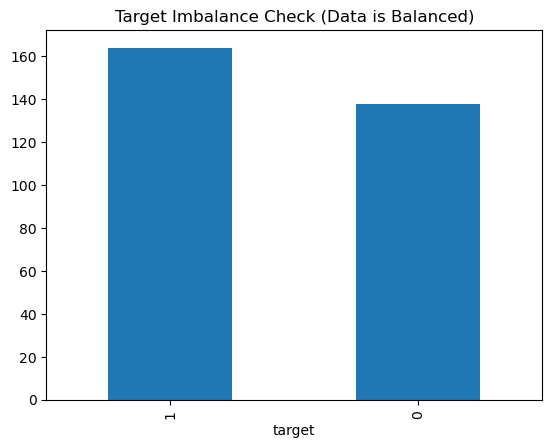

In [315]:
df["target"].value_counts().plot(kind="bar")  ## Data is Balanced
plt.title("Target Imbalance Check (Data is Balanced)")

## Knowing about each variables

- age : Age in years : Continuous
- sex	: 1 = male, 0 = female :	Binary
- cp : Chest pain type (0–3) : Categorical
- trestbps	: Resting blood pressure	: Continuous
- chol	: Serum cholesterol	: Continuous
- fbs	: Fasting blood sugar >120	: Binary
- restecg	: Resting ECG results	: Categorical
- thalach	: Max heart rate achieved	: Continuous
- exang	: Exercise-induced angina	: Binary
- oldpeak	: ST depression	: Continuous
- slope	: ST segment slope	: Ordinal
- ca	: Major vessels colored :	Discrete
- thal	: Thalassemia :	Categorical
- target	: Heart disease (1/0)	: Binary

**Important note**: Don't one-hot encode on whole data, **Slope** variable is **Ordinal**.

## Univariate Analysis per feature

In [316]:
non_cat_col=['age', 'trestbps', 'chol',  'thalach',
        'oldpeak']
cat_col=['sex', 'cp','fbs','restecg', 'exang','slope','ca','thal','target']

## Continuos Features

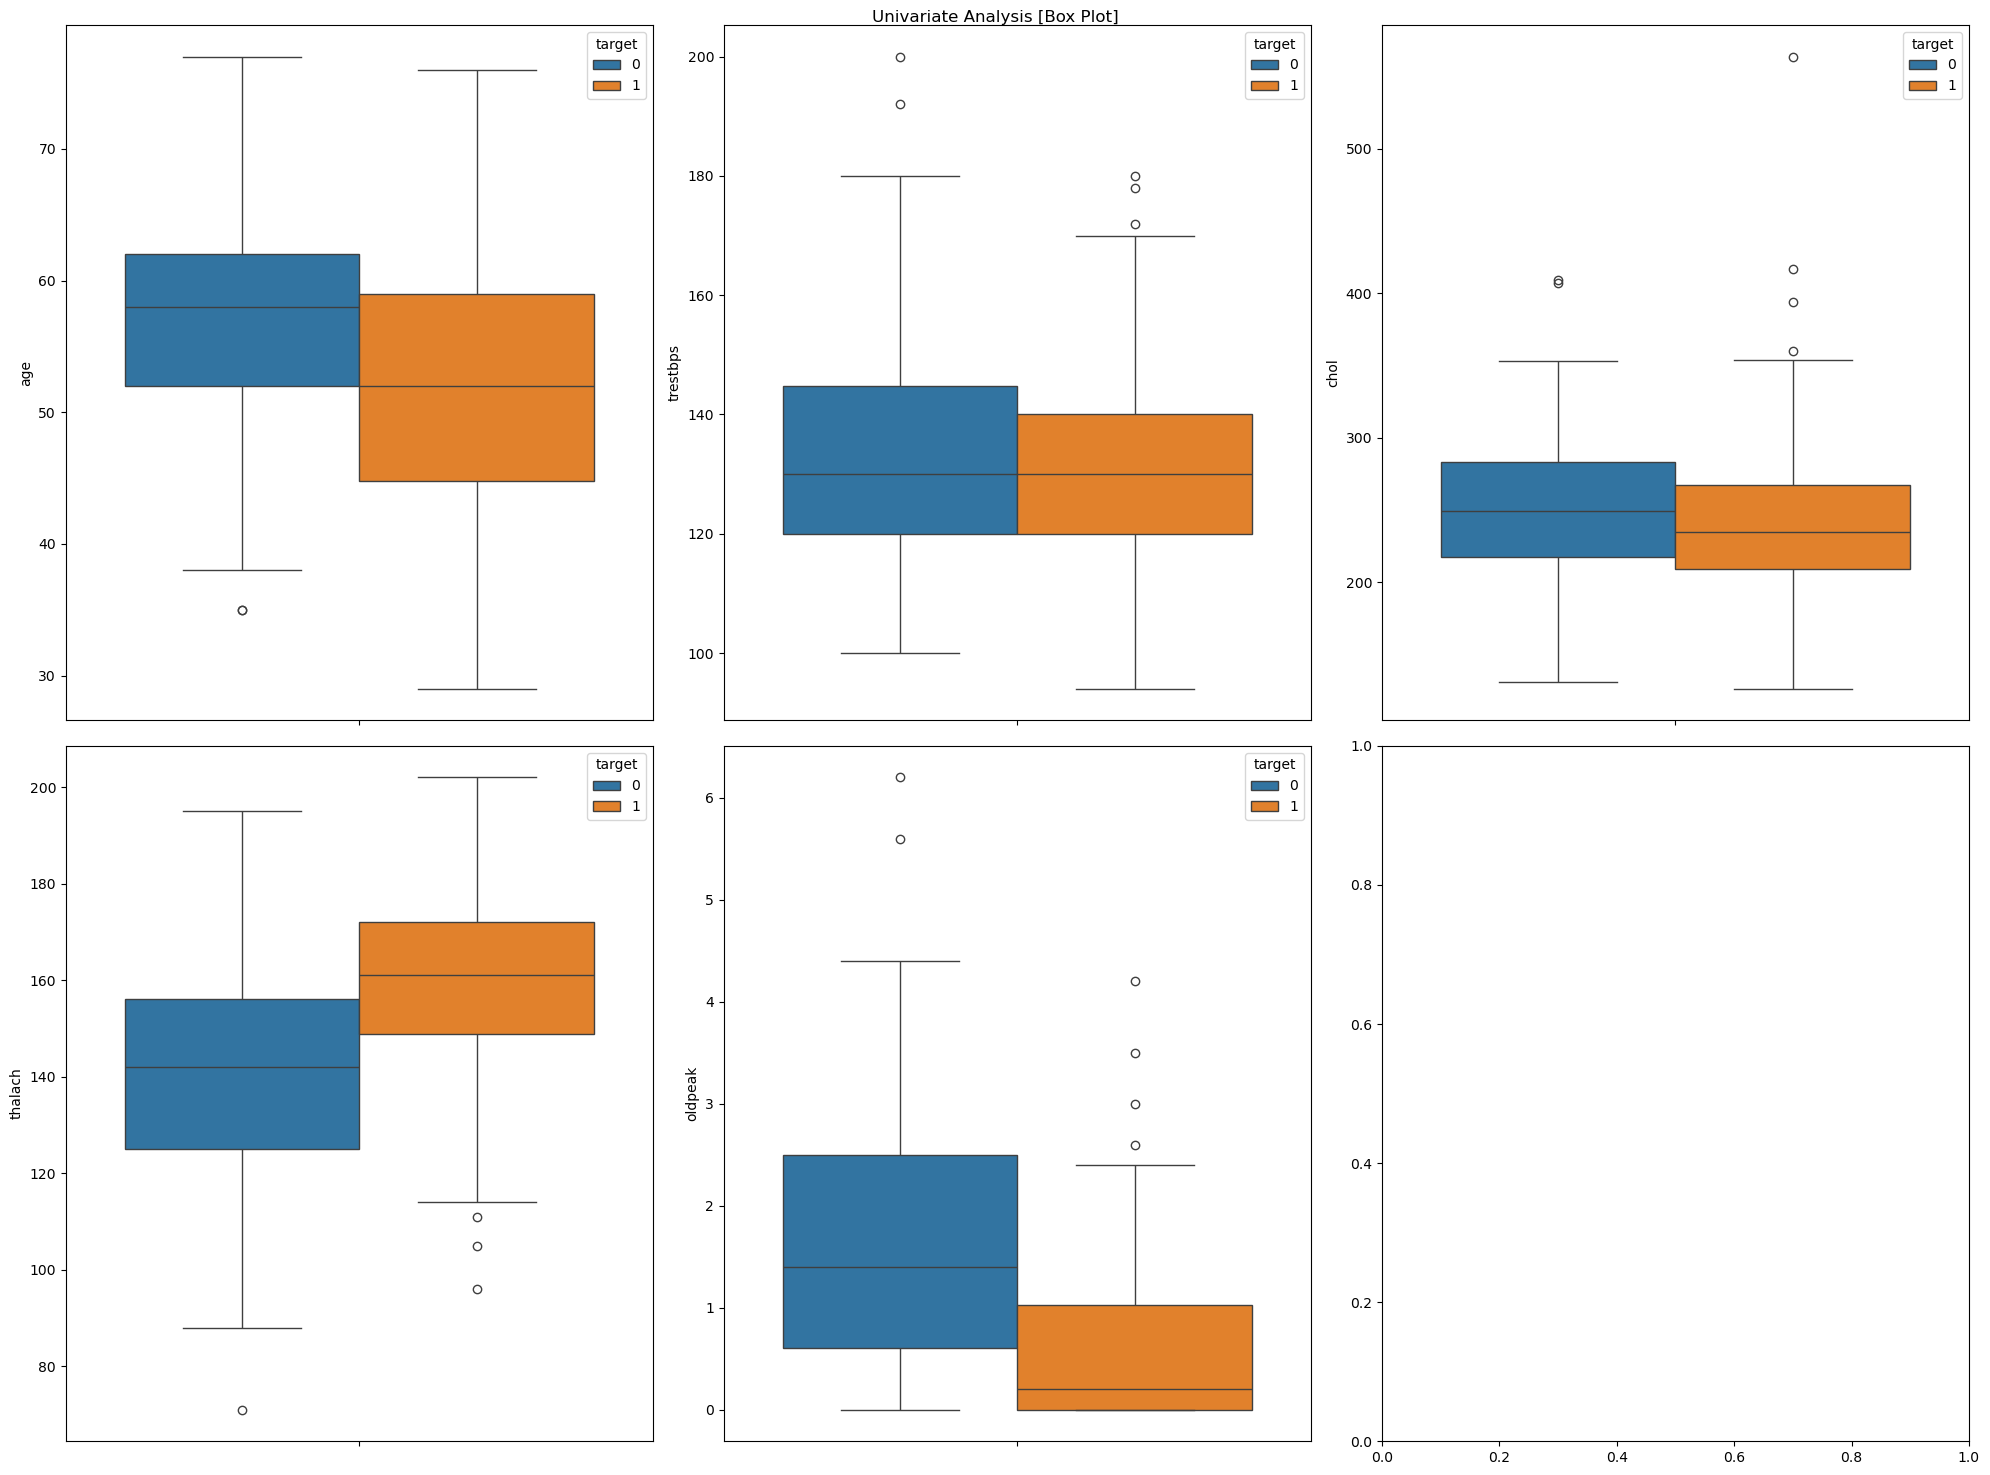

In [317]:
fig,ax=plt.subplots(2,3,figsize=(20,15))
i,j=0,0
for col in non_cat_col:
  if j==3:
    j=0
    i+=1
  if i==3:
    break
  sns.boxplot(data=df,y=col,ax=ax[i,j],hue="target")
  j+=1
plt.suptitle("Univariate Analysis [Box Plot]")
plt.tight_layout()
plt.show()

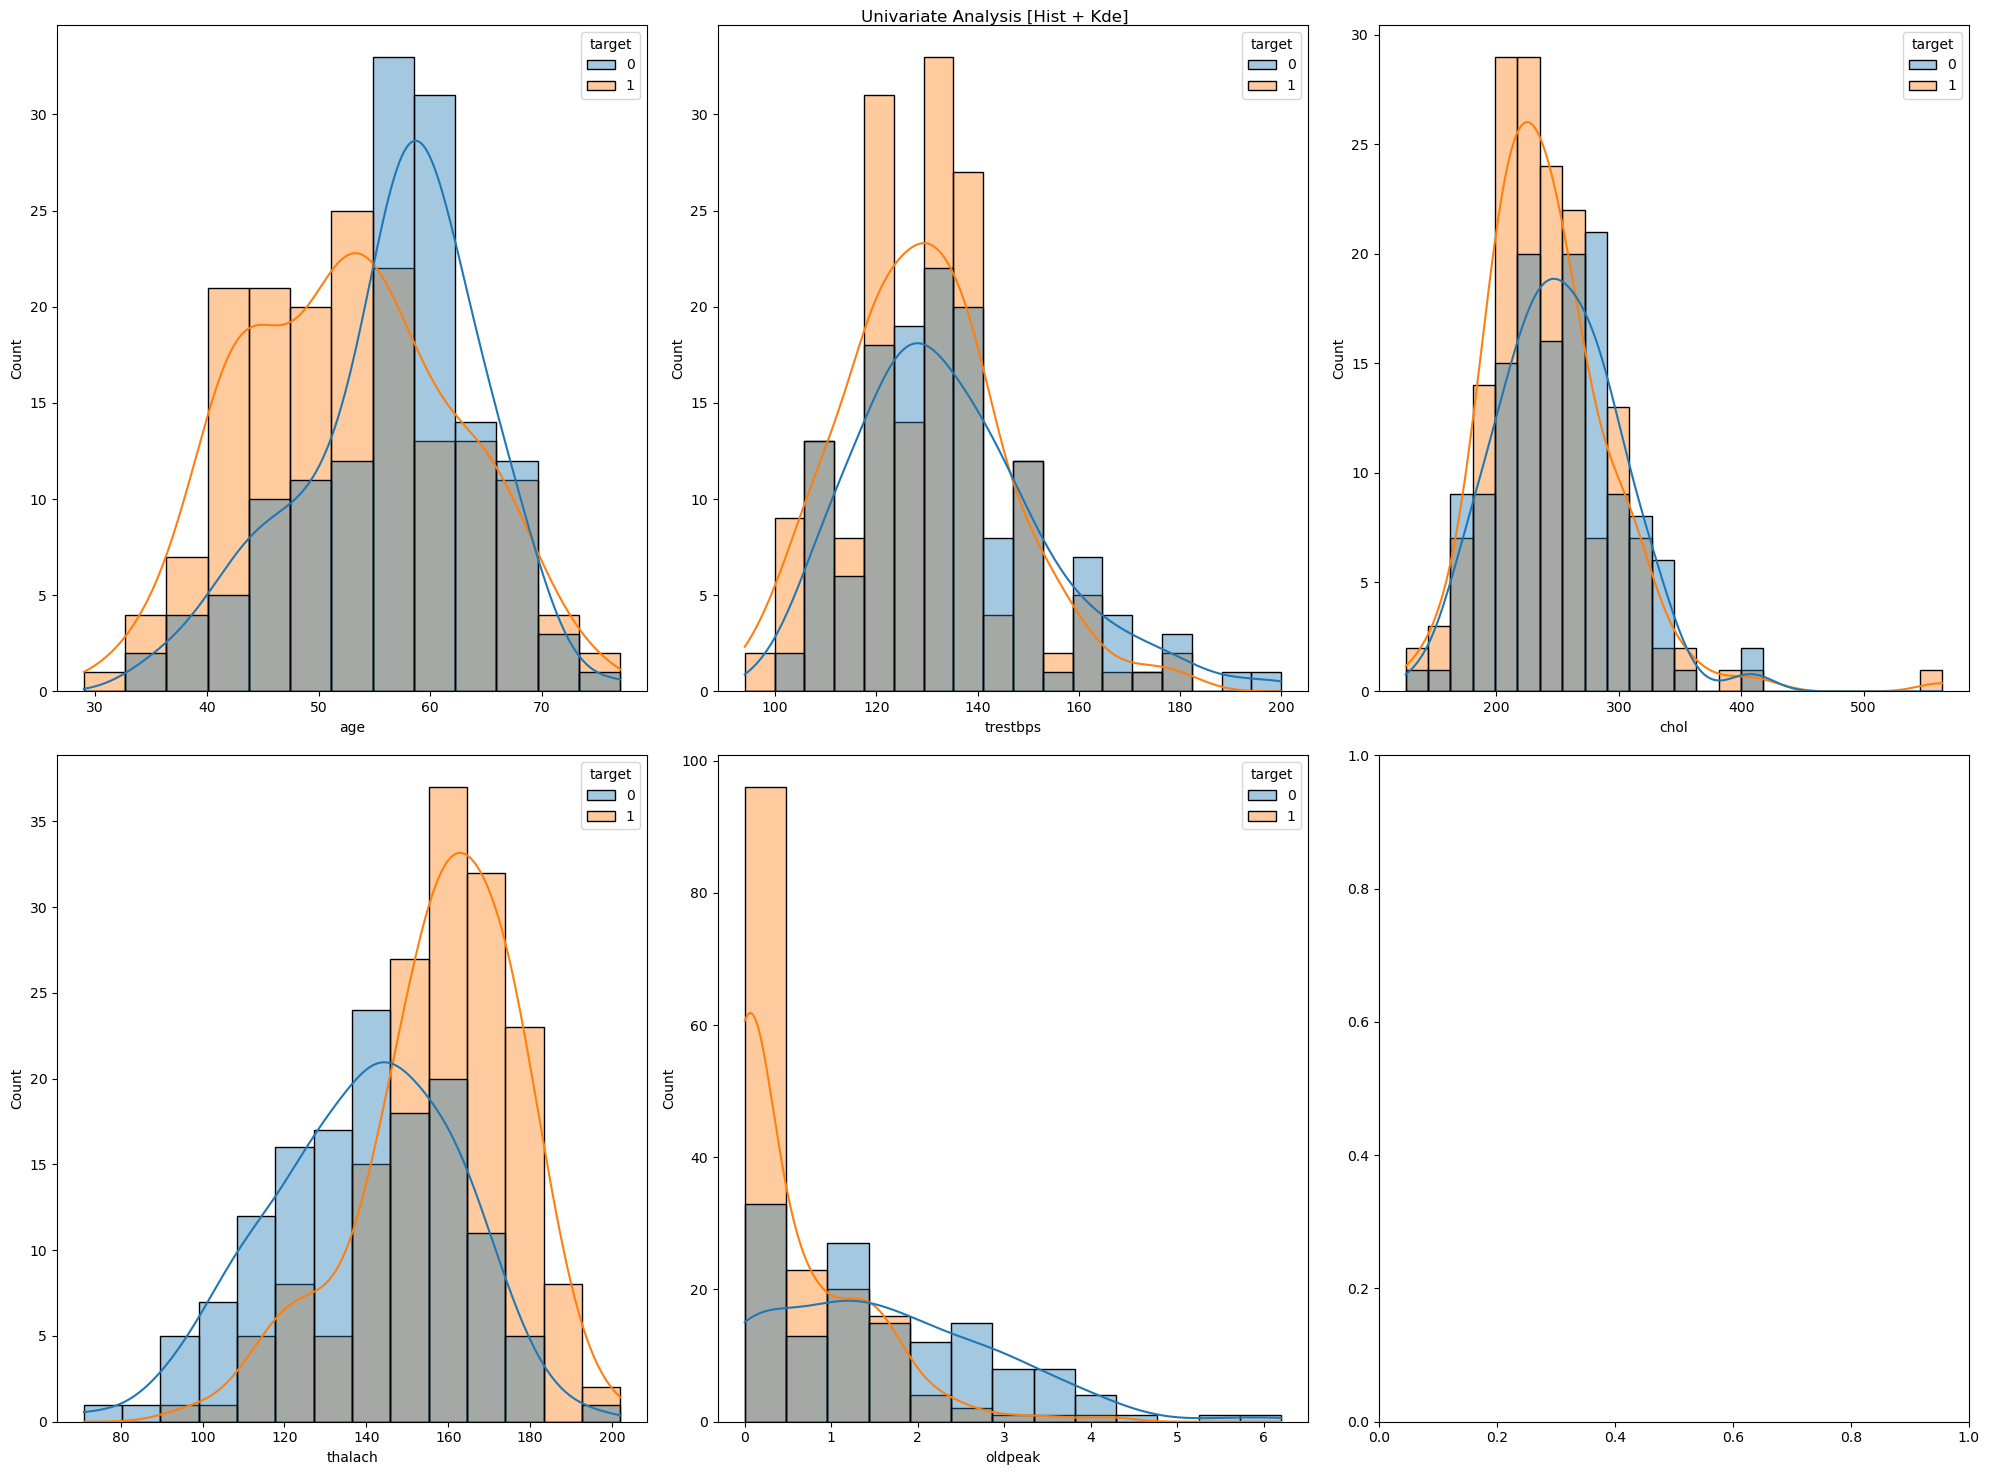

In [318]:
fig,ax=plt.subplots(2,3,figsize=(20,15))
i,j=0,0
for col in non_cat_col:
  if j==3:
    j=0
    i+=1
  if i==3:
    break
  sns.histplot(data=df,x=col,ax=ax[i,j],kde=True,hue="target",alpha=0.4)
  j+=1
plt.suptitle("Univariate Analysis [Hist + Kde]")
plt.tight_layout()
plt.show()

### **Data Insights**: Features: age, thalach and oldpeak are important ones.
- High thalach + low oldpeak + age (45-68) --> High heart disease probability

### Testing above hypothesis

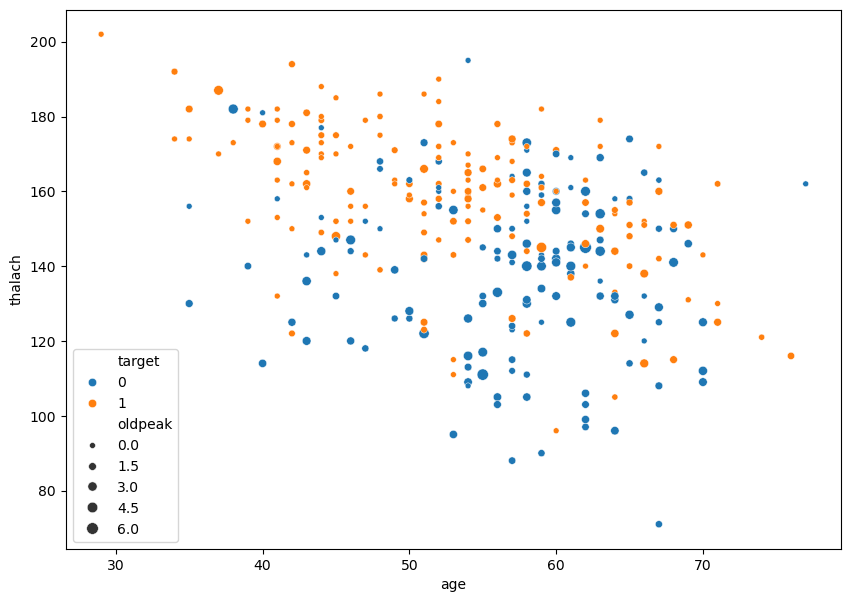

In [319]:
fig=plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x="age",y="thalach",hue="target",size="oldpeak")
plt.show()

## Categorical Features (Imbalance check)



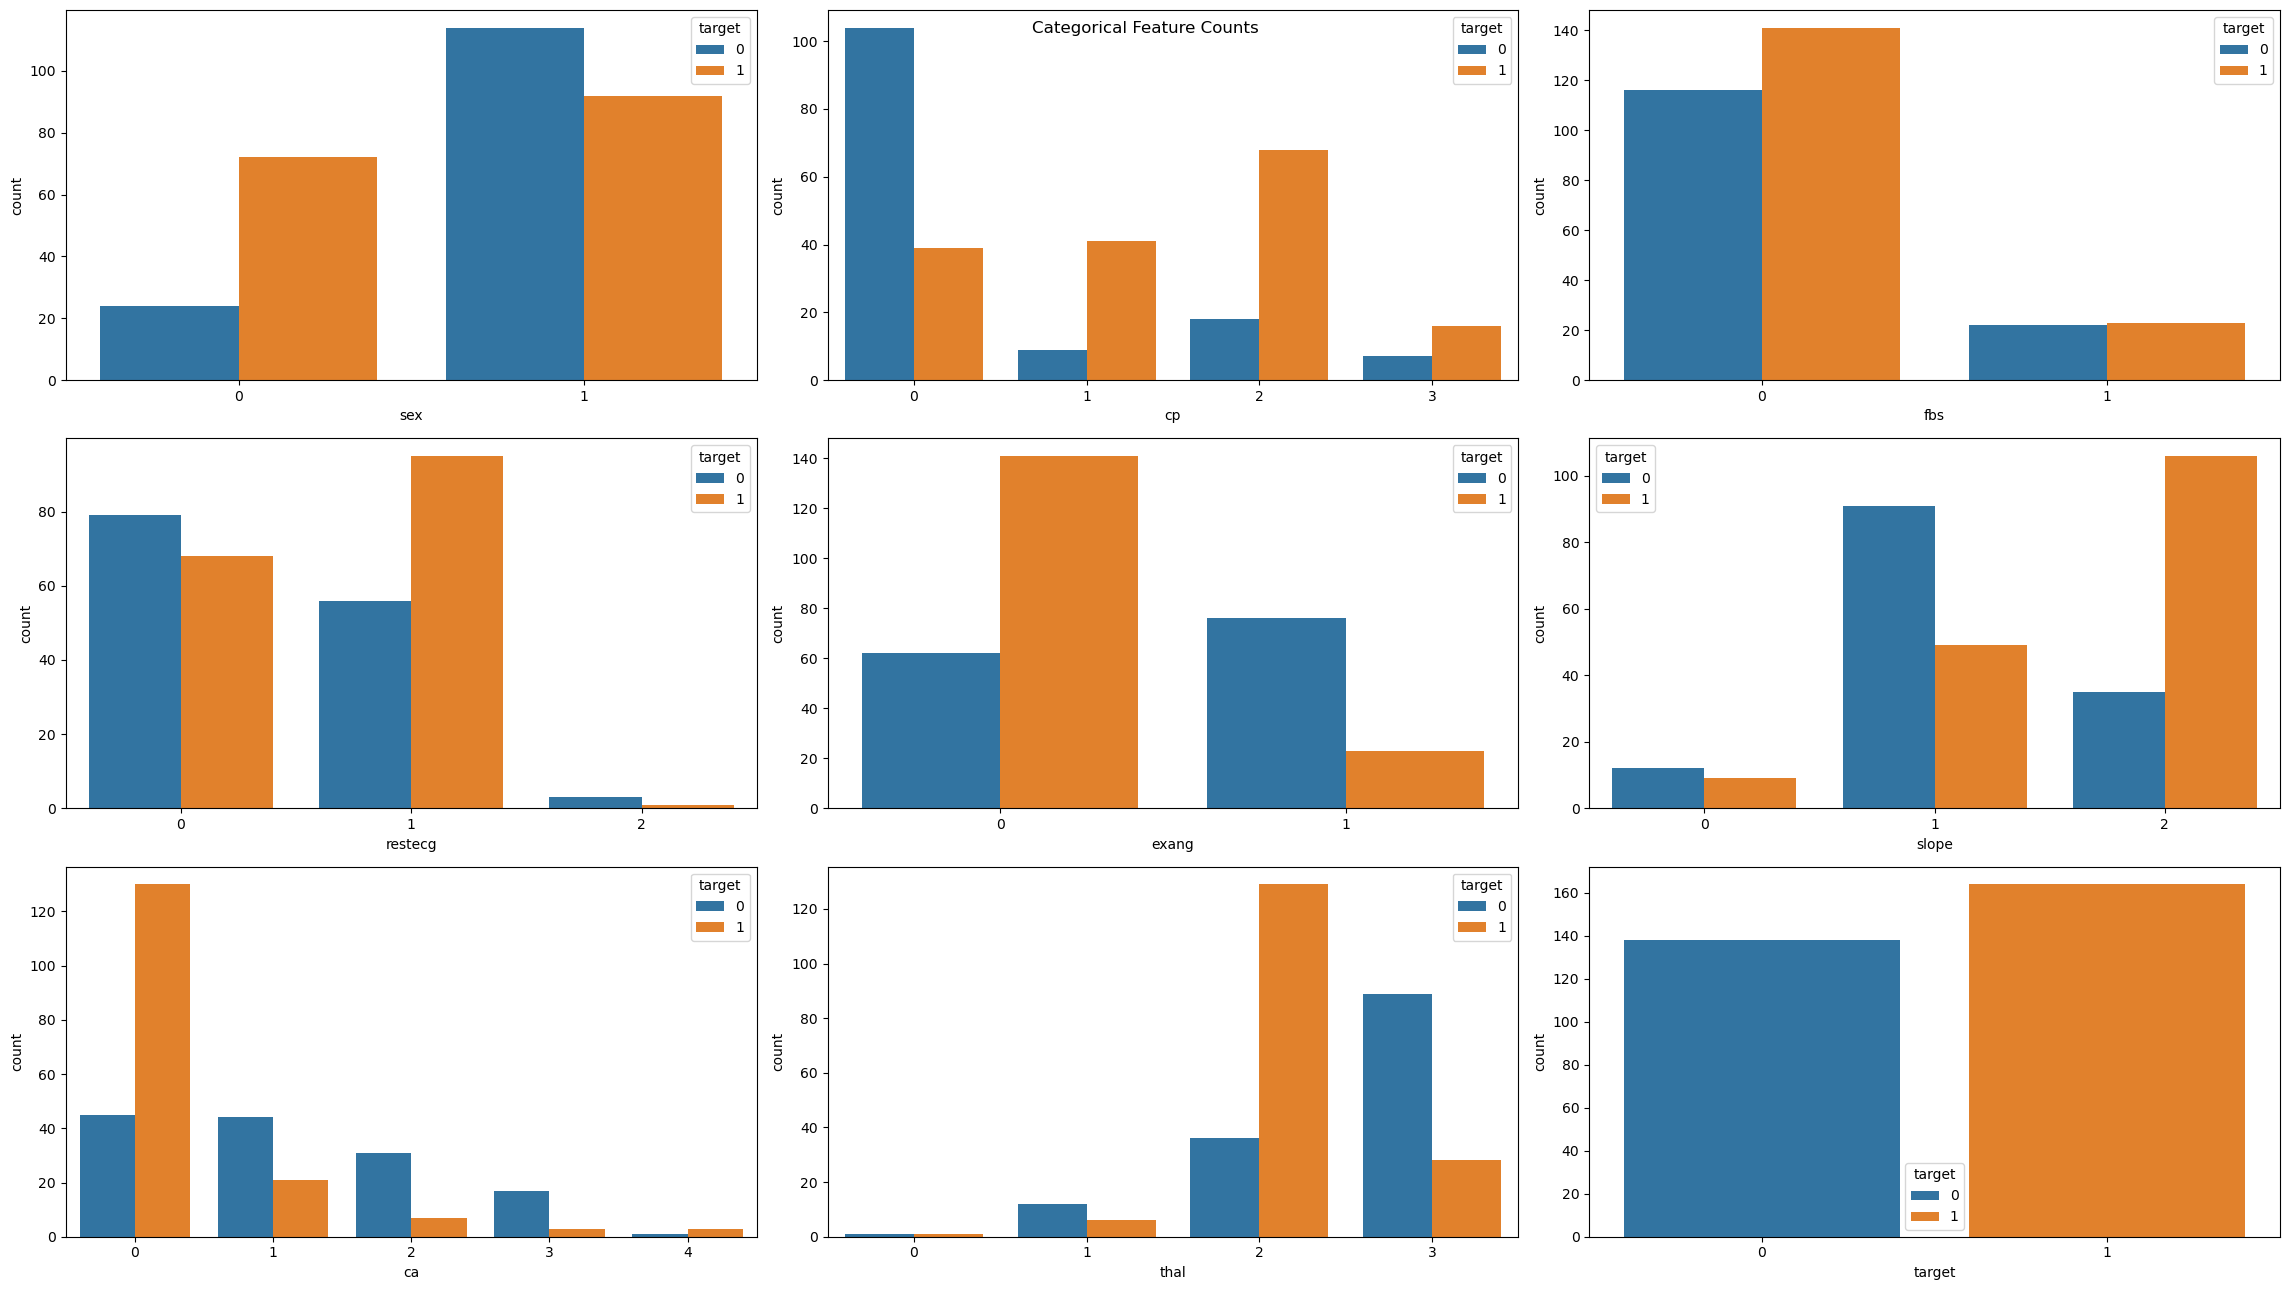

In [320]:
fig,ax= plt.subplots(3,3,figsize=(23,13))
i,j=0,0
for col in cat_col:
  if j==3:
    j=0
    i+=1
  if i==3:
    break
  sns.countplot(data=df,x=col,hue="target",ax=ax[i,j])
  j+=1
plt.tight_layout()
plt.suptitle("Categorical Feature Counts")
plt.show()

### **Data Insight** :
 Thal (2), ca(1), slope(2), exang(0), restecg(1,0), fbs(0,1),cp(2,1,3), sex(0,1) --> High chance of heart disease [Sex feature might be having biasness for females.]

## Multi-Collinearity (Continuous features + Ordinal features + Binary Categorical Target)

<Axes: >

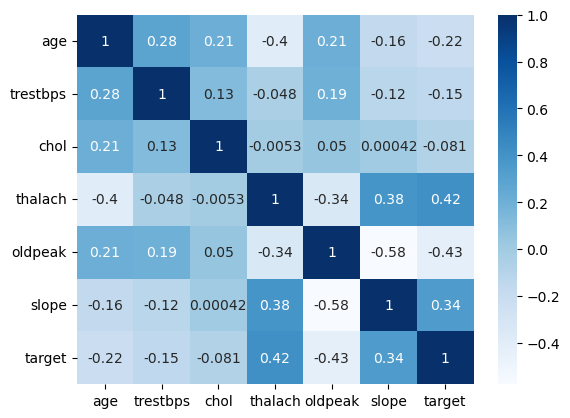

In [321]:
sns.heatmap(df[['age', 'trestbps', 'chol',  'thalach',
        'oldpeak','slope','target']].corr(),cmap="Blues",annot=True)     ## oldpeak and slope has higher collinearity, thalach & slope a bit, thalach & age a bit

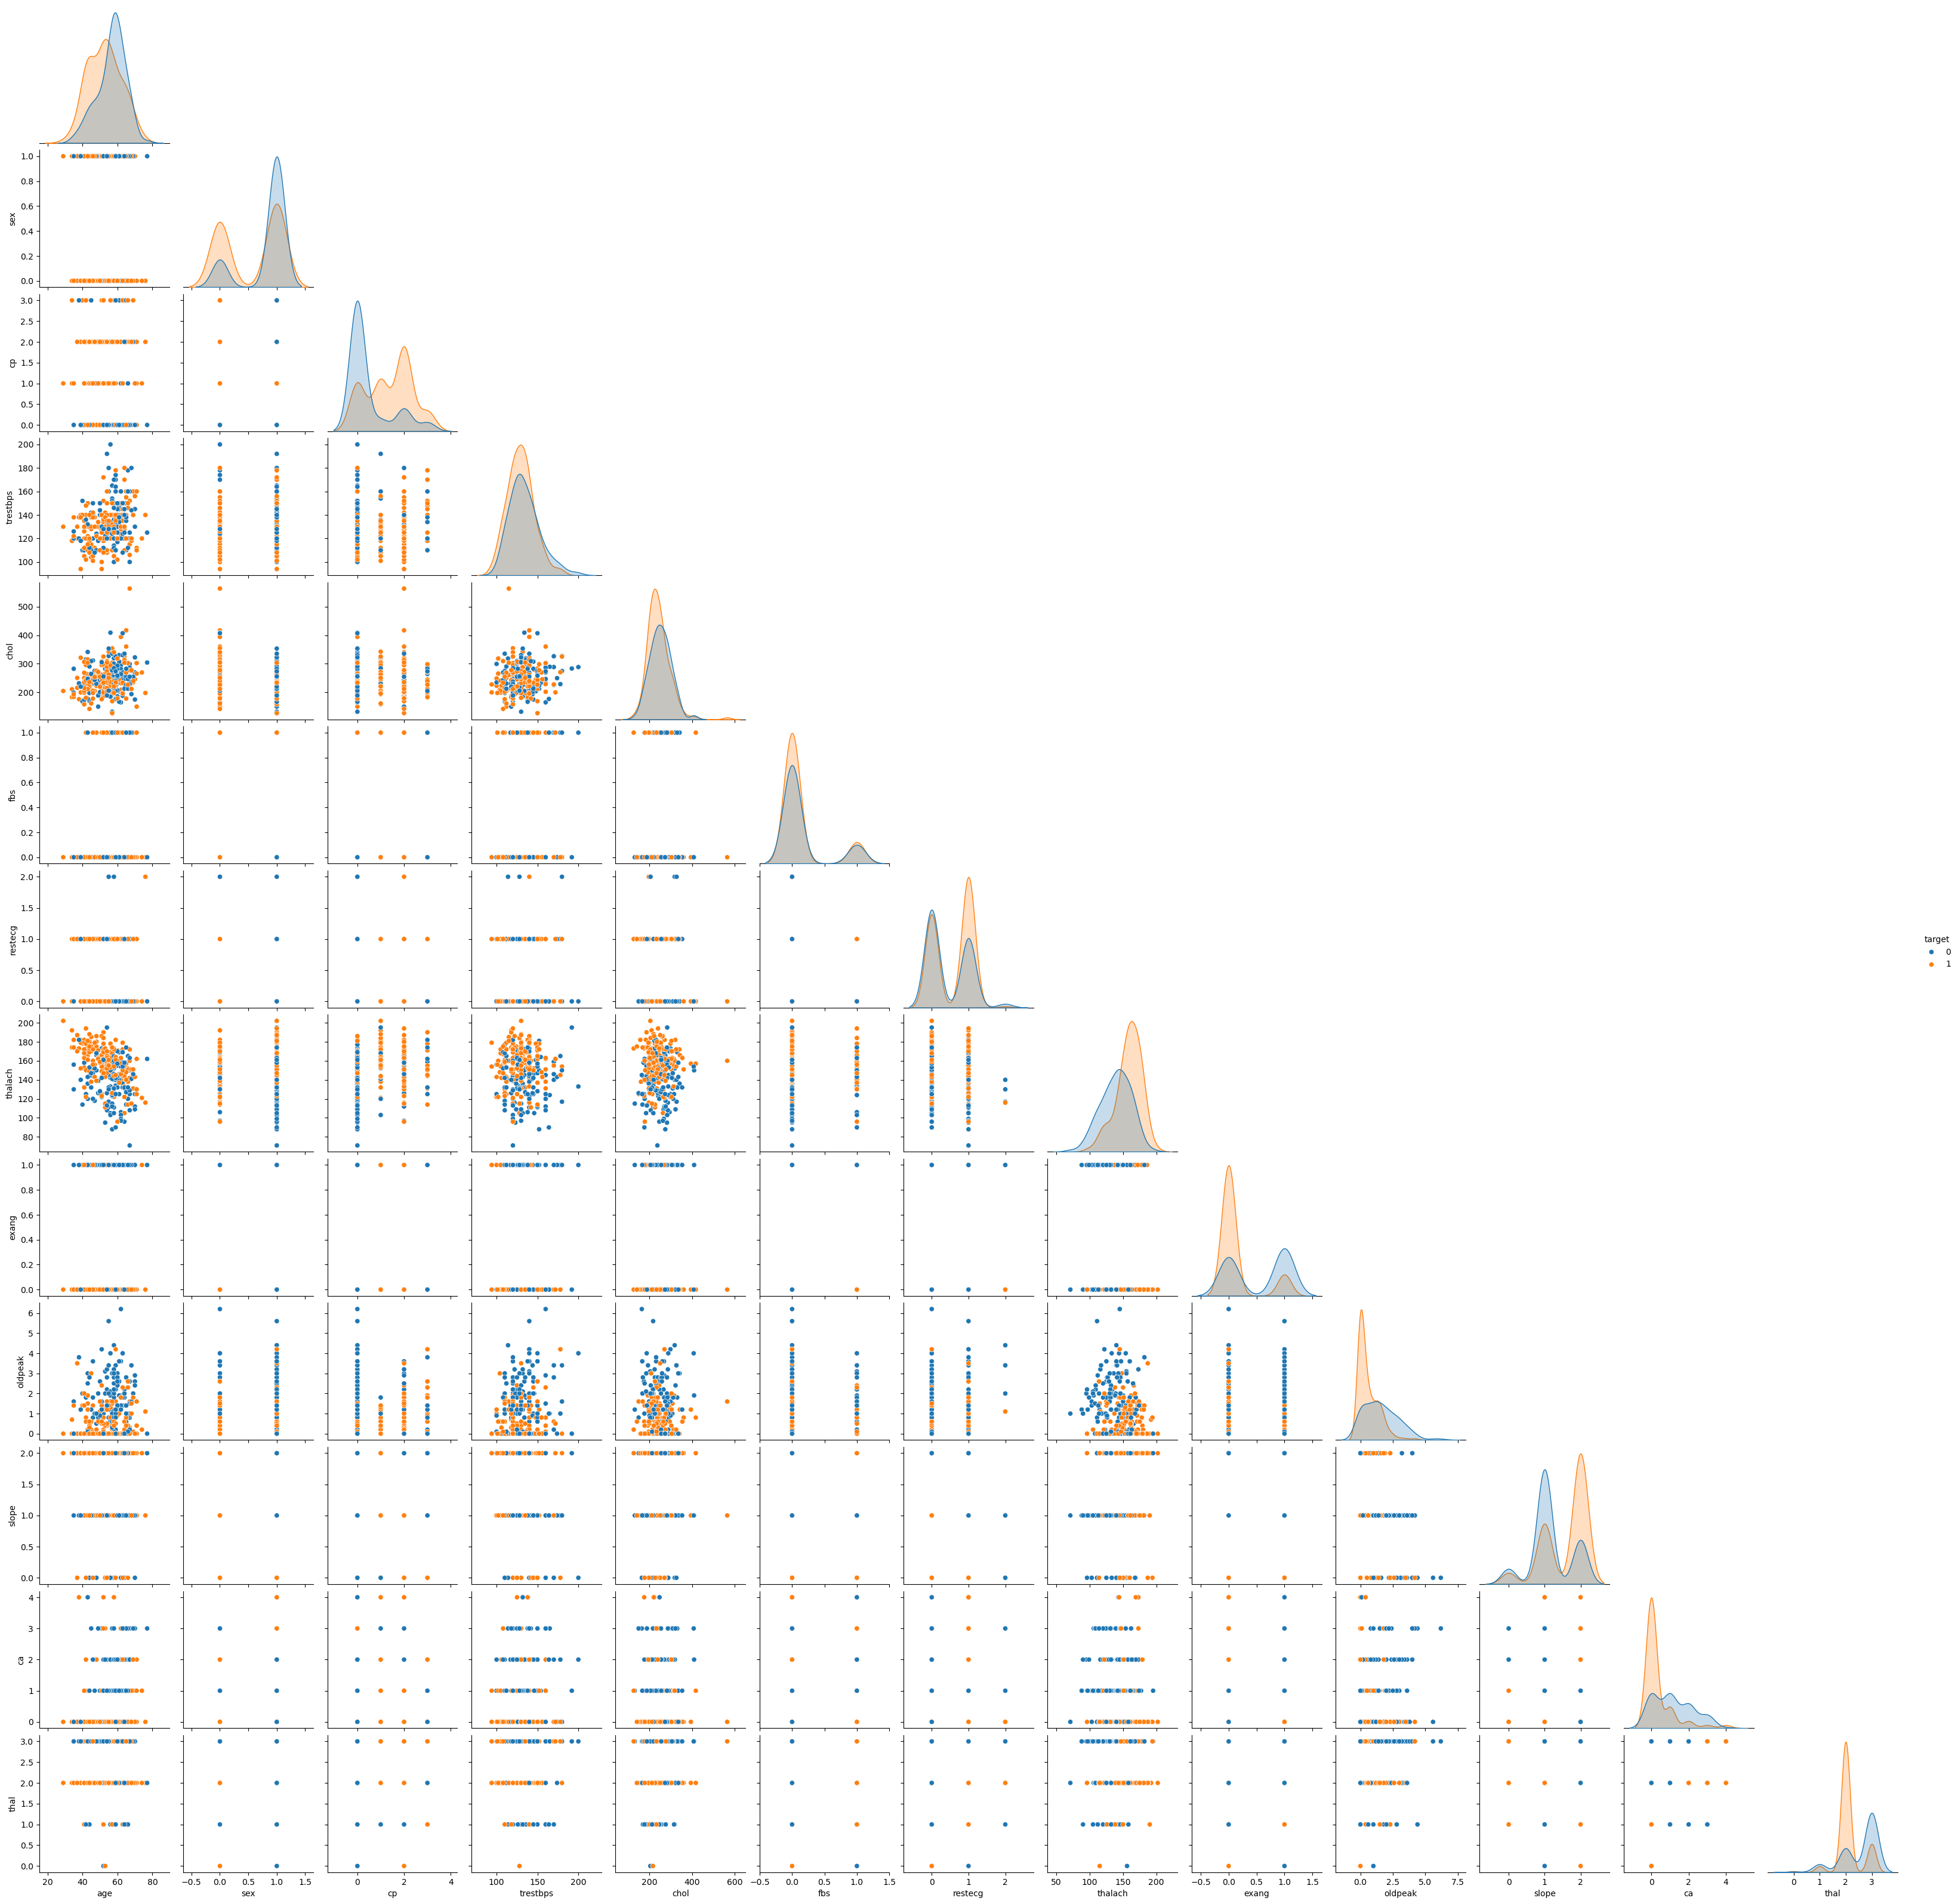

In [322]:
sns.pairplot(df,hue="target",corner=True)

C:\Users\kirti\AppData\Local\Temp\ipykernel_17988\2682288276.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df[col],bins=10))["target"].aggregate("mean").plot(kind="line",ax=ax[i,j])
C:\Users\kirti\AppData\Local\Temp\ipykernel_17988\2682288276.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df[col],bins=10))["target"].aggregate("mean").plot(kind="line",ax=ax[i,j])
C:\Users\kirti\AppData\Local\Temp\ipykernel_17988\2682288276.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fa

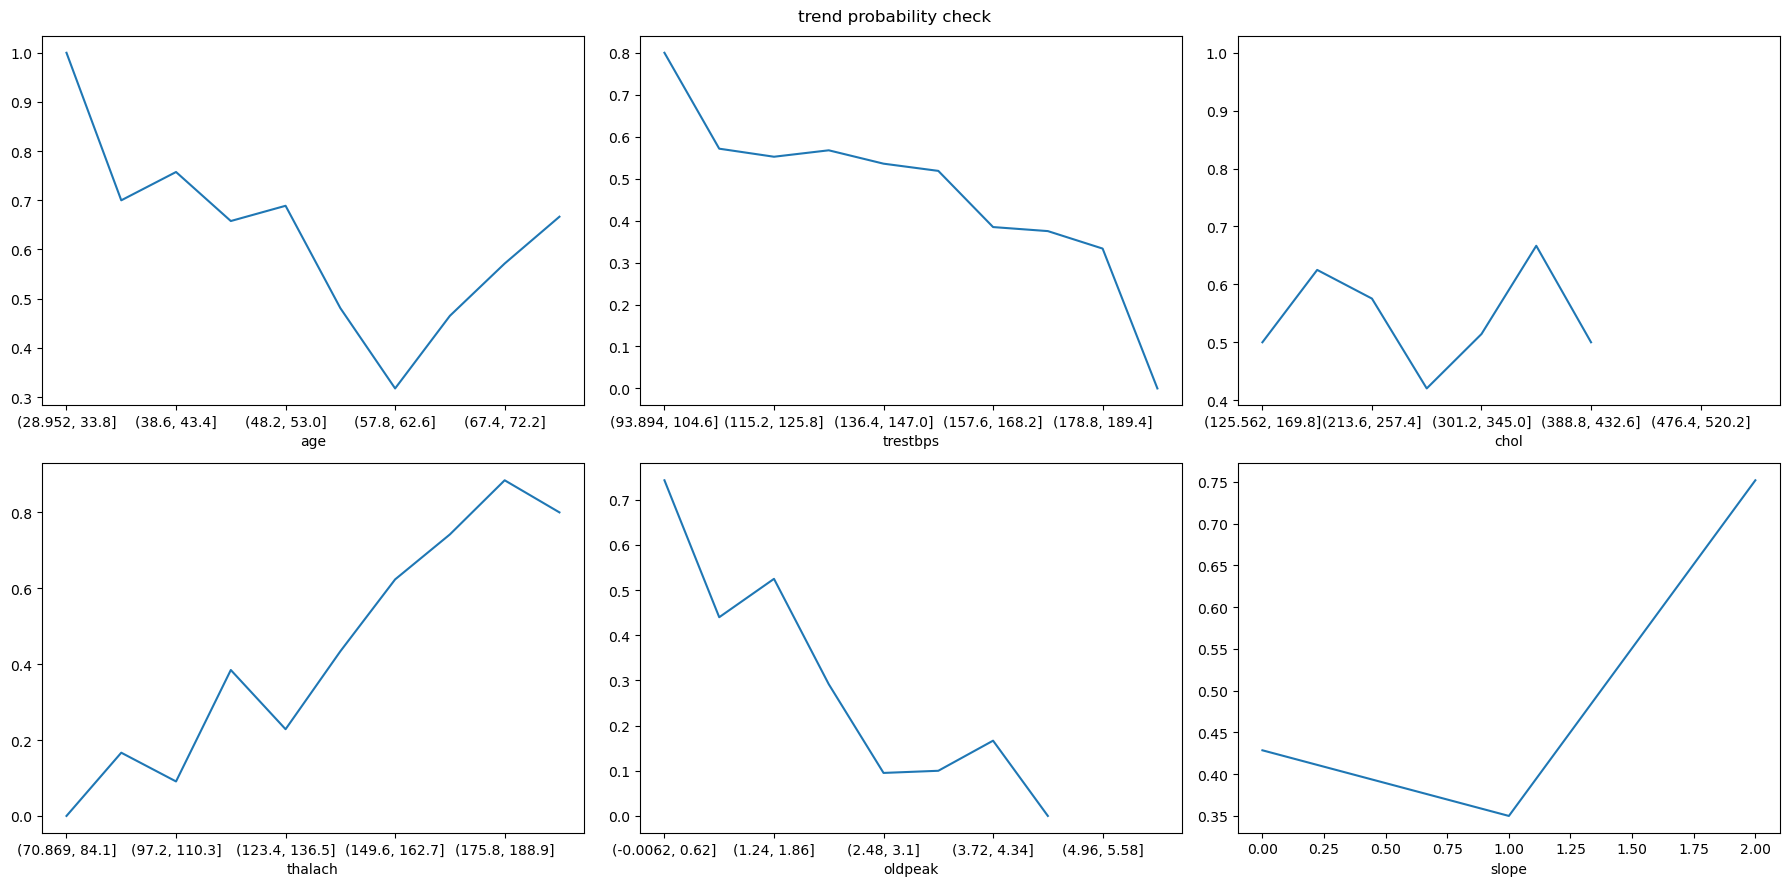

In [323]:
fig,ax=plt.subplots(2,3,figsize=(18,9))
i,j=0,0
for col in ['age', 'trestbps', 'chol',  'thalach','oldpeak','slope']:
  if j==3:
    j=0
    i+=1
  if i==2:
    Break
  if col=='slope':
    df.groupby(col)["target"].aggregate("mean").plot(kind="line",ax=ax[i,j])
  else:
    df.groupby(pd.cut(df[col],bins=10))["target"].aggregate("mean").plot(kind="line",ax=ax[i,j])

  j+=1
plt.suptitle("trend probability check")
plt.tight_layout()
plt.show()

## Model Assumptions based of EDA
- Thalach,age and oldpeak has Non-linear relationship --> Tree based models
- LDA might not work well --> distribution is not gaussian neither linearly separable
- Logistic might work as age,trestbps,thalach,oldpeak,slope all kind of shows trend, which in log-odds multidimensional space might be linearly separable.

- Also dataset is small, more chances of overfitting therefore, simple models seems better choice.

## Preprocessing Data

In [324]:
X=df.drop("target",axis=1)
y=df["target"]

In [325]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

## Baseline Models Testing

### Best Metric to evaluate for this problem statement : **Positive Class Recall**
### Data is Balanced

In [326]:
## Dummy classifier
df["target"].value_counts()
print("Dummy Model Accuracy:",164/(164+138))

Dummy Model Accuracy: 0.543046357615894


## Dummy Model Positive class Recall: 0.0 %

## Simple Linear Models

## Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train_sc,y_train)
y_pred=log_model.predict(X_test_sc)

## Evaluation model
from sklearn.metrics import accuracy_score,classification_report
def eval_score(y_pred,y_test):
  print("Accuracy score:",accuracy_score(y_pred,y_test))
  print(classification_report(y_pred,y_test))
eval_score(y_pred,y_test)

###  Logistic regression Positive class Recall: 0.78 %

pd.DataFrame(data=np.abs(log_model.coef_.reshape(-1,1)),index=X.columns,columns=["Feature importances"]).sort_values("Feature importances").plot(kind="bar")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model=LinearDiscriminantAnalysis()
lda_model.fit(X_train_sc,y_train)
y_pred=lda_model.predict(X_test_sc)
eval_score(y_pred,y_test)

### LDA Model Positive class Recall: 0.80 %

## Geometry based Models

from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train_sc,y_train)
y_pred=knn_model.predict(X_test_sc)
eval_score(y_pred,y_test)

### KNN Model Positive class Recall: 0.78 %

## Trees Based Models

from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train_sc,y_train)
y_pred=tree_model.predict(X_test_sc)
eval_score(y_pred,y_test)

## Decision Tree Model Positive class Recall: 0.74 %

from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train_sc,y_train)
y_pred=rf_model.predict(X_test_sc)
eval_score(y_pred,y_test)

### Random Forest Positive class Recall: 0.80 %

pd.DataFrame(data=np.abs(rf_model.feature_importances_.reshape(-1,1)),index=X.columns,columns=["Feature importances"]).sort_values("Feature importances").plot(kind="bar")

- LDA Model Positive class Recall: 0.80 % --> Class means separated | Variances roughly similar | Gaussian distribution
- Random Forest Positive class Recall: 0.80 % --> Interaction Strenghth | Noise robustness
- Logistic regression Positive class Recall: 0.78 % --> Monotonicity | Linear boundary
- KNN Model Positive class Recall: 0.78 % --> local neighbourhood structure | Non-linear separation
- Decision Tree Model Positive class Recall: 0.74 % --> Threshold splits | Feature Interaction
- Dummy Model Positive class Recall: 0.0 %






In [327]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
models={"Logistic":LogisticRegression(max_iter=5000),"LDA":LinearDiscriminantAnalysis(),
        "KNN":KNeighborsClassifier(),"Decision_tree":DecisionTreeClassifier(),"Random_forest":RandomForestClassifier()}
results=[]
for model,obj in models.items():
    pipeline=Pipeline([("scaler",StandardScaler()),("model",obj)])
    cv_model=cross_validate(pipeline,X_train,y_train,cv=5,scoring="recall",return_train_score=True)
    
    results.append({"Model":model,"train_score":cv_model["train_score"].mean(),
    "test_score":cv_model["test_score"].mean(),
    "test_std":cv_model["test_score"].std(),
    "gap":cv_model["train_score"].mean()-cv_model["test_score"].mean()})
    

In [328]:
pd.DataFrame(results).sort_values(["test_score"],ascending=False)

,Model,train_score,test_score,test_std,gap
1,LDA,0.921148,0.872874,0.048432,0.048275
0,Logistic,0.909412,0.866207,0.046495,0.043205
2,KNN,0.912759,0.859310,0.023853,0.053449
4,Random_forest,1.000000,0.845977,0.071301,0.154023
3,Decision_tree,1.000000,0.718851,0.089507,0.281149


### Analysis
- LDA & Logistic worked good --> Data has linear structure
- Decision tree & Random Forest are overfitting
- KNN has highest standard deviation --> Data sensitive model

### Model choosed for hyperparameter tuning : LDA & Logistic

## LDA

In [329]:
from sklearn.model_selection import GridSearchCV

pipeline=Pipeline([("scaler",StandardScaler()),("estimator",LinearDiscriminantAnalysis())])
param_grid=[{"estimator__solver":["svd"]},{"estimator__solver":["lsqr", "eigen"],"estimator__shrinkage": ["auto", 0.1, 0.5, 0.9]}]

grid_model=GridSearchCV(estimator=pipeline,param_grid=param_grid,scoring="recall",cv=5,return_train_score=True)
grid_model.fit(X_train,y_train)


,estimator,Pipeline(step...tAnalysis())])
,param_grid,"[{'estimator__solver': ['svd']}, {'estimator__shrinkage': ['auto', 0.1, ...], 'estimator__solver': ['lsqr', 'eigen']}]"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,copy,True


In [330]:
pd.DataFrame(grid_model.cv_results_)[['params',"mean_test_score","std_test_score","mean_train_score"]].sort_values("mean_test_score",ascending=False)

,params,mean_test_score,std_test_score,mean_train_score
6,"{'estimator__shrinkage': 0.5, 'estimator__solv...",0.899770,0.046816,0.922843
5,"{'estimator__shrinkage': 0.5, 'estimator__solv...",0.899770,0.046816,0.922843
7,"{'estimator__shrinkage': 0.9, 'estimator__solv...",0.893103,0.048647,0.902675
1,"{'estimator__shrinkage': 'auto', 'estimator__s...",0.893103,0.048647,0.926190
2,"{'estimator__shrinkage': 'auto', 'estimator__s...",0.893103,0.048647,0.926190
8,"{'estimator__shrinkage': 0.9, 'estimator__solv...",0.893103,0.048647,0.902675
4,"{'estimator__shrinkage': 0.1, 'estimator__solv...",0.879770,0.061503,0.921148
3,"{'estimator__shrinkage': 0.1, 'estimator__solv...",0.879770,0.061503,0.921148
0,{'estimator__solver': 'svd'},0.872874,0.048432,0.921148


In [331]:
best_model=grid_model.best_estimator_
y_pred=best_model.predict(X_test)
eval_score(y_pred,y_test)

Accuracy score: 0.7741935483870968
              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.93      0.70      0.80        20

    accuracy                           0.77        31
   macro avg       0.78      0.80      0.77        31
weighted avg       0.82      0.77      0.78        31



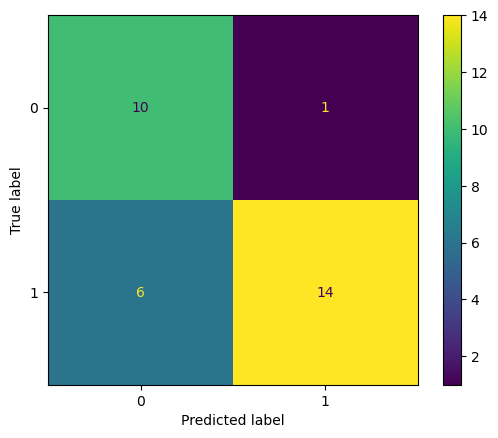

In [332]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test)).plot()


In [333]:
print(grid_model.best_params_,"score:",grid_model.best_score_)

{'estimator__shrinkage': 0.5, 'estimator__solver': 'lsqr'} score: 0.8997701149425288


## Logistic Regression

In [334]:
from sklearn.model_selection import GridSearchCV

pipeline=Pipeline([("scaler",StandardScaler()),("estimator",LogisticRegression())])
param_grid={"estimator__C":[0.001, 0.01, 0.1, 1, 10, 100],"estimator__penalty":["l1", "l2"],"estimator__solver":["liblinear"]}

grid_model=GridSearchCV(estimator=pipeline,param_grid=param_grid,scoring="recall",cv=5,return_train_score=True)
grid_model.fit(X_train,y_train)


,estimator,Pipeline(step...egression())])
,param_grid,"{'estimator__C': [0.001, 0.01, ...], 'estimator__penalty': ['l1', 'l2'], 'estimator__solver': ['liblinear']}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,copy,True


In [335]:
pd.DataFrame(grid_model.cv_results_)[['params',"mean_test_score","std_test_score","mean_train_score"]].sort_values("mean_test_score",ascending=False)

,params,mean_test_score,std_test_score,mean_train_score
3,"{'estimator__C': 0.01, 'estimator__penalty': '...",0.886437,0.053822,0.907717
5,"{'estimator__C': 0.1, 'estimator__penalty': 'l...",0.872874,0.052822,0.914468
7,"{'estimator__C': 1, 'estimator__penalty': 'l2'...",0.866207,0.046495,0.909412
9,"{'estimator__C': 10, 'estimator__penalty': 'l2...",0.866207,0.046495,0.909412
10,"{'estimator__C': 100, 'estimator__penalty': 'l...",0.866207,0.046495,0.907731
11,"{'estimator__C': 100, 'estimator__penalty': 'l...",0.866207,0.046495,0.907731
8,"{'estimator__C': 10, 'estimator__penalty': 'l1...",0.866207,0.046495,0.907731
1,"{'estimator__C': 0.001, 'estimator__penalty': ...",0.859540,0.064119,0.887591
6,"{'estimator__C': 1, 'estimator__penalty': 'l1'...",0.852874,0.061233,0.907731
4,"{'estimator__C': 0.1, 'estimator__penalty': 'l...",0.825977,0.056477,0.887647


## Problem and lesson learned
- {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'} score: 1.0 , it is highly unlikely to get this result
- Lesson Learned: To never use StandardScaler separate if using cross_validate or GridsearchCV (Causes Too Optimistic Results)

In [336]:
print(grid_model.best_params_,"score:",grid_model.best_score_)

{'estimator__C': 0.01, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'} score: 0.8864367816091955


In [337]:
best_model=grid_model.best_estimator_
y_pred=best_model.predict(X_test)
eval_score(y_pred,y_test)

Accuracy score: 0.7741935483870968
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.87      0.72      0.79        18

    accuracy                           0.77        31
   macro avg       0.78      0.78      0.77        31
weighted avg       0.79      0.77      0.78        31



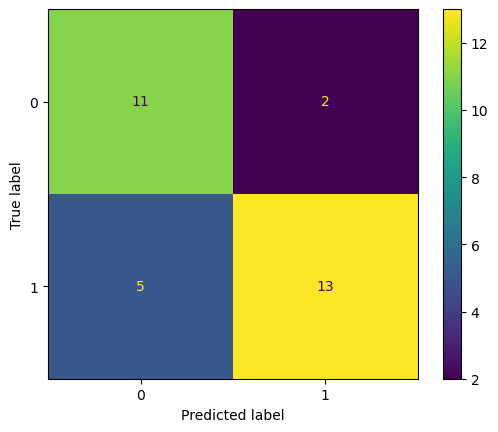

In [338]:
ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test)).plot()

## Final Production Model

In [339]:
sc=StandardScaler()
X_sc=sc.fit_transform(X)

In [340]:
final_model= LinearDiscriminantAnalysis(shrinkage=0.5,solver='lsqr')
final_model.fit(X_sc,y)

,solver,'lsqr'
,shrinkage,0.5
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None
